# Action Potential Tutorial

### In this tutorial, we'll explore the mechanisms of the action potential and how to simulate a cell in the NEURON + Python environment. We'll start by importing some necessary libraries for later use.

In [15]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()
from neuron import h
import matplotlib.pyplot as plt

h.load_file('stdrun.hoc')

1.0

## 1) <u>Create the cell and define its geometry

### Just as in the Passive Cell tutorial, we will define our cell and its geometry

In [16]:
#Create the soma section and define the default parameters
soma = h.Section(name='soma')
soma.diam = 200 #default is micrometers
soma.L = 100 #um

## 2) <u>Define the cell's biophysics
### This time, we will make the conductances of the active channels nonzero so that we will see some action potentials.

In [17]:
soma.cm = 1.4884e-4/6.2832e-4 #uF

#Insert the Hodgkin-Huxley channels and define the conductances
soma.insert('hh')
soma.gnabar_hh = 0.12
soma.gkbar_hh = 0.012
soma.gl_hh = 2.0e-5
soma.el_hh = -70

v_init = h.v_init= -60

## 3) <u>Inject Current
### Neuroscientists call this experiment a "current clamp". We place an electrode into the cell and inject current.

In [18]:
#Inject current in the middle of the soma
stim = h.IClamp(soma(0.5))
stim.delay = 100.0 #delay in ms
stim.dur = 150.0 #duration in ms
stim.amp = 0.03 #amplitude in nA

## 4) <u> Define simulation parameters and run!

In [19]:
tstop = h.tstop = 350   # how long to run the simulation in ms
h.dt = 0.025 # time step (resolution) of the simulation in ms

# define two vectors for recording variables
v0_vec = h.Vector() 
t_vec = h.Vector()

# record the voltage (_ref_v) and time (_ref_t) into the vectors we just created
v0_vec.record(soma(0.5)._ref_v)
t_vec.record(h._ref_t)

# run the simulation!
h.run()

0.0

## 5) <u> Visualize the membrane potential
### The data isn't going to visualize itself! We use a package called matplotlib to draw the vectors so we can see them.

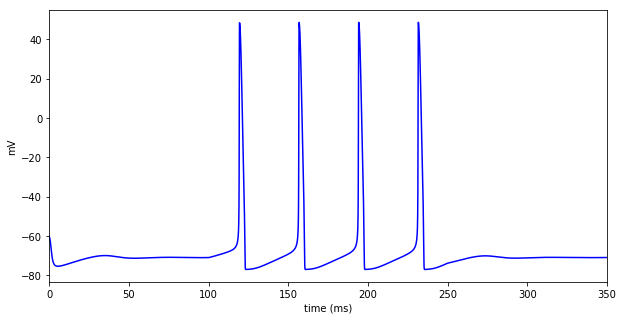

In [20]:
plt.figure(figsize=(10,5))
plt.plot(t_vec, v0_vec,'b')
plt.xlim(0, tstop)
plt.xlabel('time (ms)')
plt.ylabel('mV')

plt.show()

## 6) <u> Record the gating variables
### You should see some spikes in the plot above. If you don't, go back to the top of the notebook and run all the cells again. Neurons spike because of the voltage dependent proteins embedded in their membranes. Let's record those and then plot them just as we did for the membrane voltage.

In [21]:
m_na = h.Vector()
h_na = h.Vector()
n_k = h.Vector()

m_na.record(soma(0.5)._ref_m_hh)
h_na.record(soma(0.5)._ref_h_hh)
n_k.record(soma(0.5)._ref_n_hh)

h.run()

0.0

## 7) Visualize membrane potential and gating variables together
### This should look familiar. We're just going to plot all of the variables we just recorded at the same time so we can investigate how spikes occur.

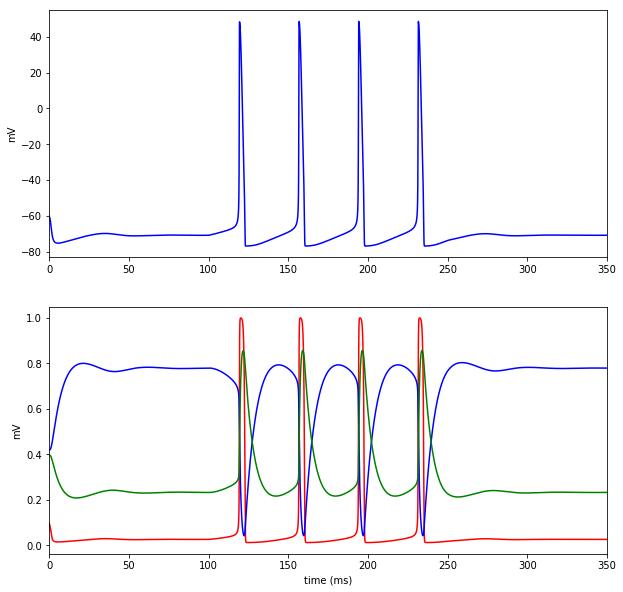

In [22]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(t_vec, v0_vec,'b')
plt.xlim(0, tstop)
plt.ylabel('mV')

plt.subplot(2,1,2)
plt.plot(t_vec, m_na,'r')
plt.plot(t_vec, h_na,'b')
plt.plot(t_vec, n_k, 'g')
plt.xlim(0, tstop)
plt.xlabel('time (ms)')
plt.ylabel('mV')

plt.show()

## You did it! Now you understand how a neuron is implemented in code. Time for the hard part.. understanding the science and math behind those spikes. You can go back in the code and change variables (such as the conductances of the Na and K channels) and re run the simulation to see the effects.